In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#Getting the data fashion_mnist from keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
#we have 60,000 samples and each of them represented by 28x28 pixels

In [0]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
#The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255, since we need the output between 0-1
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
def get_new_model(input_shape=(28,28)):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return(model)
  

In [0]:
lr_to_test=[1E-7,1E-6,1E-5,1E-4,1E-3,1E-2,1E-1,1E0,1E1,1E2]

In [0]:
Adam_acc=[]
for lr in lr_to_test:
  print('\n\nTesting Adam model with learning rate: %f\n'%lr )
  model1 = get_new_model()
  optimizer1 = Adam(lr=lr)
  model1.compile(optimizer=optimizer1,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  h1=model1.fit(train_images,train_labels,epochs=5)
  Adam_acc.append(max(h1.history['acc']))




Testing Adam model with learning rate: 0.000000

Epoch 1/5
60000/60000 [==============================] - 15s 255us/sample - loss: 2.3025 - acc: 0.0539
Epoch 2/5
60000/60000 [==============================] - 15s 246us/sample - loss: 2.3023 - acc: 0.0733
Epoch 3/5
60000/60000 [==============================] - 15s 253us/sample - loss: 2.3021 - acc: 0.0970
Epoch 4/5
60000/60000 [==============================] - 15s 253us/sample - loss: 2.3019 - acc: 0.1255
Epoch 5/5
60000/60000 [==============================] - 15s 247us/sample - loss: 2.3017 - acc: 0.1568


Testing Adam model with learning rate: 0.000001

Epoch 1/5
60000/60000 [==============================] - 16s 270us/sample - loss: 2.3013 - acc: 0.1771
Epoch 2/5
60000/60000 [==============================] - 13s 212us/sample - loss: 2.2990 - acc: 0.3961
Epoch 3/5
60000/60000 [==============================] - 15s 250us/sample - loss: 2.2970 - acc: 0.4386
Epoch 4/5
60000/60000 [==============================] - 15s 255us/sample 

In [0]:
SGD_acc=[]
for lr in lr_to_test:  
  print('\n\nTesting SGD model with learning rate: %f\n'%lr )
  model2=get_new_model()
  optimizer2 = SGD(lr=lr)
  model2.compile(optimizer=optimizer2,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  h2=model2.fit(train_images,train_labels,epochs=5)
  SGD_acc.append(max(h2.history['acc']))



Testing SGD model with learning rate: 0.000000

Epoch 1/5
60000/60000 [==============================] - 15s 249us/sample - loss: 2.3028 - acc: 0.1242
Epoch 2/5
60000/60000 [==============================] - 13s 219us/sample - loss: 2.3028 - acc: 0.1244
Epoch 3/5
60000/60000 [==============================] - 7s 118us/sample - loss: 2.3028 - acc: 0.1245
Epoch 4/5
60000/60000 [==============================] - 14s 241us/sample - loss: 2.3028 - acc: 0.1246
Epoch 5/5
60000/60000 [==============================] - 7s 120us/sample - loss: 2.3028 - acc: 0.1248


Testing SGD model with learning rate: 0.000001

Epoch 1/5
60000/60000 [==============================] - 15s 258us/sample - loss: 2.3025 - acc: 0.0627
Epoch 2/5
60000/60000 [==============================] - 7s 123us/sample - loss: 2.3025 - acc: 0.0636
Epoch 3/5
60000/60000 [==============================] - 13s 216us/sample - loss: 2.3025 - acc: 0.0648
Epoch 4/5
60000/60000 [==============================] - 7s 121us/sample - loss

In [0]:
Adagrad_acc=[]
for lr in lr_to_test:  
  print('\n\nTesting Adagrad model with learning rate: %f\n'%lr )
  model3=get_new_model()
  optimizer3 = Adagrad(lr=lr)
  model3.compile(optimizer=optimizer3,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  h3=model3.fit(train_images,train_labels,epochs=5)
  Adagrad_acc.append(max(h3.history['acc']))



Testing Adagrad model with learning rate: 0.000000

Epoch 1/5
60000/60000 [==============================] - 12s 203us/sample - loss: 2.3026 - acc: 0.1120
Epoch 2/5
60000/60000 [==============================] - 11s 186us/sample - loss: 2.3026 - acc: 0.1128
Epoch 3/5
60000/60000 [==============================] - 11s 191us/sample - loss: 2.3026 - acc: 0.1132
Epoch 4/5
60000/60000 [==============================] - 11s 186us/sample - loss: 2.3026 - acc: 0.1137
Epoch 5/5
60000/60000 [==============================] - 11s 175us/sample - loss: 2.3026 - acc: 0.1138


Testing Adagrad model with learning rate: 0.000001

Epoch 1/5
60000/60000 [==============================] - 12s 196us/sample - loss: 2.3030 - acc: 0.0675
Epoch 2/5
60000/60000 [==============================] - 10s 169us/sample - loss: 2.3030 - acc: 0.0725
Epoch 3/5
60000/60000 [==============================] - 12s 195us/sample - loss: 2.3029 - acc: 0.0754
Epoch 4/5
60000/60000 [==============================] - 11s 186us/s

In [0]:
print(max(Adam_acc))
print(max(SGD_acc))
print(max(Adagrad_acc))


0.87095
0.43761668
0.84243333


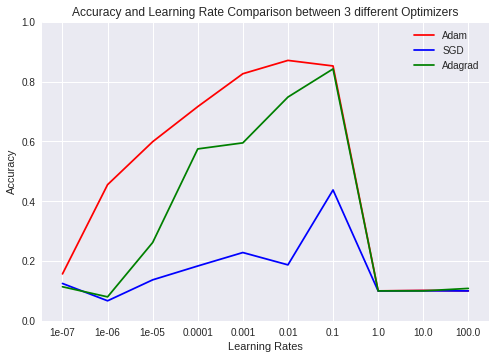

In [0]:
xi = [i for i in range(0, len(lr_to_test))]
plt.plot(xi,Adam_acc,label="Adam",color='r')
plt.plot(xi,SGD_acc,label='SGD',color='b')
plt.plot(xi,Adagrad_acc,label='Adagrad',color='green')
plt.ylim(0,1)
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy') 
plt.xticks(xi, lr_to_test)
plt.title('Accuracy and Learning Rate Comparison between 3 different Optimizers')
plt.legend(loc='best') 
plt.show()
plt.show()
